# Mercedes-Benz Greener Manufacturing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_train=pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')

In [3]:
df_train.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df_train.shape

(4209, 378)

In [5]:
df_test.shape

(4209, 377)

In [6]:
df_train.columns

Index(['ID', 'y', 'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8',
       ...
       'X375', 'X376', 'X377', 'X378', 'X379', 'X380', 'X382', 'X383', 'X384',
       'X385'],
      dtype='object', length=378)

# Create an ML algorithm that can accurately predict the time a car will spend on the test bench 

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 378 entries, ID to X385
dtypes: float64(1), int64(369), object(8)
memory usage: 12.1+ MB


# If for any column(s), the variance is equal to zero, then you need to remove those variable(s).

In [8]:
final_df_columns=list(set(df_train.columns)-set(['ID','y']))
X_train=df_train[final_df_columns]
X_test=df_test[final_df_columns]

In [9]:
for column in final_df_columns:
    check=len(np.unique(X_train[column]))
    if check==1:
        X_train.drop(column,axis=1,inplace=True)
        X_test.drop(column,axis=1,inplace=True)
        

In [10]:
df_train.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [11]:
df_train.isnull().sum().sort_values(ascending=False)

ID      0
X254    0
X263    0
X262    0
X261    0
       ..
X127    0
X126    0
X125    0
X124    0
X385    0
Length: 378, dtype: int64

In [12]:
df_test.isnull().sum().sort_values(ascending=False)

ID      0
X255    0
X264    0
X263    0
X262    0
       ..
X128    0
X127    0
X126    0
X125    0
X385    0
Length: 377, dtype: int64

### No null values present in any of the data set

# Check for null and unique values for test and train sets.

In [13]:
for column in df_train:
    print(df_train[column].unique())
    print('----------------')

[   0    6    7 ... 8412 8415 8417]
----------------
[130.81  88.53  76.26 ...  85.71 108.77  87.48]
----------------
['k' 'az' 't' 'al' 'o' 'w' 'j' 'h' 's' 'n' 'ay' 'f' 'x' 'y' 'aj' 'ak' 'am'
 'z' 'q' 'at' 'ap' 'v' 'af' 'a' 'e' 'ai' 'd' 'aq' 'c' 'aa' 'ba' 'as' 'i'
 'r' 'b' 'ax' 'bc' 'u' 'ad' 'au' 'm' 'l' 'aw' 'ao' 'ac' 'g' 'ab']
----------------
['v' 't' 'w' 'b' 'r' 'l' 's' 'aa' 'c' 'a' 'e' 'h' 'z' 'j' 'o' 'u' 'p' 'n'
 'i' 'y' 'd' 'f' 'm' 'k' 'g' 'q' 'ab']
----------------
['at' 'av' 'n' 'e' 'as' 'aq' 'r' 'ai' 'ak' 'm' 'a' 'k' 'ae' 's' 'f' 'd'
 'ag' 'ay' 'ac' 'ap' 'g' 'i' 'aw' 'y' 'b' 'ao' 'al' 'h' 'x' 'au' 't' 'an'
 'z' 'ah' 'p' 'am' 'j' 'q' 'af' 'l' 'aa' 'c' 'o' 'ar']
----------------
['a' 'e' 'c' 'f' 'd' 'b' 'g']
----------------
['d' 'b' 'c' 'a']
----------------
['u' 'y' 'x' 'h' 'g' 'f' 'j' 'i' 'd' 'c' 'af' 'ag' 'ab' 'ac' 'ad' 'ae'
 'ah' 'l' 'k' 'n' 'm' 'p' 'q' 's' 'r' 'v' 'w' 'o' 'aa']
----------------
['j' 'l' 'd' 'h' 'i' 'a' 'g' 'c' 'k' 'e' 'f' 'b']
----------------
['o' 'x' '

In [14]:
X_train['X1'].unique()

array(['v', 't', 'w', 'b', 'r', 'l', 's', 'aa', 'c', 'a', 'e', 'h', 'z',
       'j', 'o', 'u', 'p', 'n', 'i', 'y', 'd', 'f', 'm', 'k', 'g', 'q',
       'ab'], dtype=object)

# Apply label encoder.

In [15]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
le=LabelEncoder()
train_category=[]
for i in X_train:
    data_type=X_train[i].dtype
    if data_type=='object':
        print(i)
        train_category.append(i)
        X_train[i]=le.fit_transform(X_train[i])
        

X2
X3
X5
X6
X8
X0
X4
X1


In [16]:
test_category=[]
for i in X_train:
    data_type=X_test[i].dtype
    if data_type=='object':
        print(i)
        test_category.append(i)
        X_test[i]=le.fit_transform(X_test[i])

X2
X3
X5
X6
X8
X0
X4
X1


In [17]:
for column in X_train:
    print(X_train[column].unique())
    print('----------------')

[0 1]
----------------
[1 0]
----------------
[0 1]
----------------
[0 1]
----------------
[0 1]
----------------
[17 19 34 25 16 14 38  7  8 33  0 31  3 39 26 24  5 21  2 13 27 29 20 42
 22 12  9 28 41 18 40 11 43  6 36 10 30 37  4 32  1 23 35 15]
----------------
[0 1]
----------------
[0 1]
----------------
[0 1]
----------------
[1 0]
----------------
[1 0]
----------------
[0 1]
----------------
[0 1]
----------------
[0 1]
----------------
[0 1]
----------------
[0 1]
----------------
[0 1]
----------------
[0 1]
----------------
[0 1]
----------------
[0 1]
----------------
[0 4 2 5 3 1 6]
----------------
[1 0]
----------------
[0 1]
----------------
[0 1]
----------------
[0 1]
----------------
[0 1]
----------------
[0 1]
----------------
[1 0]
----------------
[0 1]
----------------
[0 1]
----------------
[0 1]
----------------
[0 1]
----------------
[0 1]
----------------
[1 0]
----------------
[0 1]
----------------
[0 1]
----------------
[0 1]
----------------
[0 1]
----

In [18]:
y_output=df_train['y']

# Perform dimensionality reduction.

In [19]:
from sklearn.decomposition import PCA
pca=PCA(n_components=5,random_state=42)
train_transform=pca.fit_transform(X_train)
test_transform=pca.transform(X_test)


In [20]:
pca_components = np.arange(pca.n_components_) + 1
pca_components

array([1, 2, 3, 4, 5])

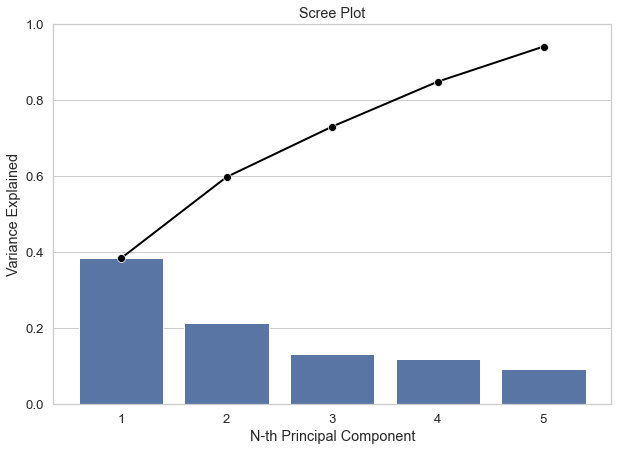

In [21]:
#To see proprtion of each PC
_ = sns.set(style='whitegrid', font_scale=1.2)
fig, ax = plt.subplots(figsize=(10, 7))
_ = sns.barplot(x=pca_components, y=pca.explained_variance_ratio_, color='b')
_ = sns.lineplot(x=pca_components-1, y=np.cumsum(pca.explained_variance_ratio_), color='black', linestyle='-', linewidth=2, marker='o', markersize=8)

plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 1)
plt.show()

In [22]:
explained_variance=pca.explained_variance_ratio_

In [23]:
explained_variance

array([0.38334782, 0.21388033, 0.13261866, 0.11826642, 0.09206008])

In [24]:
pca_components**2

array([ 1,  4,  9, 16, 25], dtype=int32)

In [25]:
pca.n_components

5

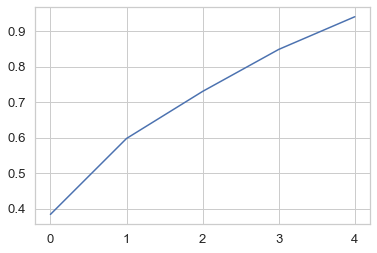

In [26]:
import matplotlib.pyplot as plt
plt.plot(np.cumsum(explained_variance))

In [27]:
from xgboost import XGBRegressor

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [29]:
X_train,X_test,y_train,y_test=train_test_split(train_transform,y_output,test_size=0.3)

In [30]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(test_transform.shape)

(2946, 5)
(1263, 5)
(2946,)
(1263,)
(4209, 5)


In [31]:
xgb_reg=XGBRegressor(objective='reg:linear',n_estimators=20,seed=123)

In [32]:
model=xgb_reg.fit(X_train,y_train)

[20:56:53] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.


In [33]:
pred=xgb_reg.predict(X_test)

In [34]:
from sklearn.metrics import mean_squared_error

In [35]:
np.sqrt(mean_squared_error(pred,y_test))

10.598875721818661

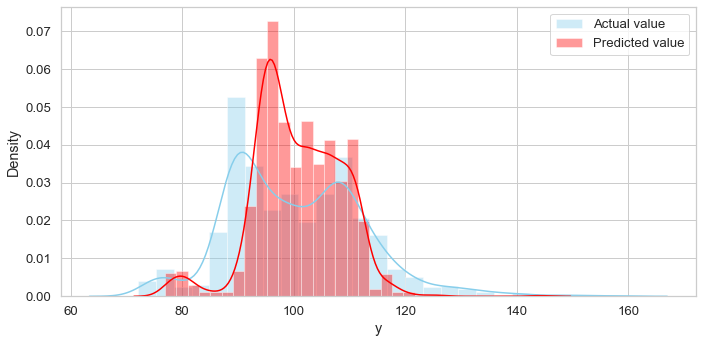

In [36]:
plt.figure(figsize=(10,5))

sns.distplot(y_test[y_test<160], color="skyblue", label="Actual value")
sns.distplot(pred[pred<160] , color="red", label="Predicted value")
plt.legend()

plt.tight_layout()

In [37]:
train_transform.shape

(4209, 5)

# Predict your test_df values using XGBoost.

In [38]:
import xgboost as xgb
from xgboost import DMatrix
dmatrix=xgb.DMatrix(data=test_transform,label=y_output)
params={'objective':'reg:linear','n_estimator':20,'seed':123}
model_cv=xgb.cv(dtrain=dmatrix,params=params,nfold=3,
               num_boost_round=50,early_stopping_rounds=10,
               metrics='rmse',as_pandas=True,seed=7)
model_cv.tail(5)

[20:56:54] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[20:56:54] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[20:56:54] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[20:56:54] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by langua

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
8,12.614777,0.252621,13.588230,0.589852
9,12.135202,0.307303,13.324274,0.504651
10,11.884554,0.311397,13.208192,0.442875
11,11.720609,0.301765,13.160649,0.390062
12,11.618654,0.304457,13.158451,0.353172


In [39]:
test_pred=model.predict(test_transform)
test_pred

array([ 77.66791, 100.76012, 100.03347, ..., 105.78521, 109.23786,
        99.97338], dtype=float32)

In [48]:
df=pd.read_csv('test.csv')

In [49]:
submission = pd.DataFrame({
    'ID' : df_test['ID'],
    'y' : test_pred
})

submission.head()

,ID,y
0,1,77.667908
1,2,100.760117
2,3,100.033470
3,4,80.816727
4,5,107.322510


In [51]:
submission.to_csv('Submission_data.csv', index = False)